# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight was wondring if the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch? They collected data by surveying Star Wars fans using SurveyMonkey. They recieved 835 total responses which can be found on their [GitHub Repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project we are going to clean and explore the dataset that contains the survey results.

In [53]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
columns = star_wars.columns
columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

We need to specify the encoding when reading in the dataset because it contains some characters that are not in Python's default utf-8 encoding.

Looking at the column names there seem to be a lot of unnamed columns lets take a look at the first few rows of data to get a better idea of what these columns contain.

In [55]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

Some of the questions ask the respondent to select multiple answers and that type of data is hard to represtent as a column. We can see an example of this with the column "Which of the following Star Wars films have you seen? Please select all that apply." and the 5 Unnamed columns that follow. These columns will need to be cleaned for easier use.

### Data Cleaning

Let's start with the columns 'Have you seen any of the 6 films in the Star Wars franchise?' and 'Do you consider yourself to be a fan of the Star Wars film franchise?'. Both contain string values Yes and No as well as some NaN where respondents chose not to answer. Converting the columns to boolean values makes them easier to work with because we can select the rows that are True or False without having to do a string comparison.

Since they have the same structure we will also change the values in the columns 'Are you familiar with the Expanded Universe?' and 'Do you consider yourself to be a fan of the Expanded Universe?'

In [56]:
yes_no = {'Yes':True, 'No':False}

for col in ['Have you seen any of the 6 films in the Star Wars franchise?',
           'Do you consider yourself to be a fan of the Star Wars film franchise?',
           'Are you familiar with the Expanded Universe?',
           'Do you consider yourself to be a fan of the Expanded Universe?']:
    star_wars[col] = star_wars[col].map(yes_no)
    
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,True,False,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,False,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,True,False,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,True,False,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,True,False,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,False,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,False,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,True,False,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,False,NaN,No,Male,18-29,"$25

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, 'Which of the following Star Wars films have you seen? Please select all that apply'.

The columns for this question are:

* Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each column the value in the cell is the movie name if the respondent saw the movie or NaN if not.

For each of these columns we will convert the values to booleans and rename the columns to be more intuitive. We will use 'seen' and the number of the movie as the new column names.

In [57]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan:False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [58]:
star_wars = star_wars.rename(columns = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                            'Unnamed: 4':'seen_2',
                            'Unnamed: 5':'seen_3',
                            'Unnamed: 6':'seen_4',
                            'Unnamed: 7':'seen_5',
                            'Unnamed: 8':'seen_6'})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,True,False,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,False,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,False,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,True,False,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next 6 columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. These columns contain values 1-6 or NaN. Like the previous 6 columns, each columns refers to a specific movie with column 'Please rank the Star Wars films...' refering to how much the respondent liked Episode 1, 'Unnamed: 10' refering to how much the respondent like Episode 2 and so on.

For these columns we need to convert them to numeric types and rename the columns.

In [59]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)

star_wars = star_wars.rename(columns = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                            'Unnamed: 10':'ranking_2',
                            'Unnamed: 11':'ranking_3',
                            'Unnamed: 12':'ranking_4',
                            'Unnamed: 13':'ranking_5',
                            'Unnamed: 14':'ranking_6'})

star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   RespondentID                                                                                                    1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                    1186 non-null   bool   
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                           836 non-null    object 
 3   seen_1                                                                                                          1186 non-null   bool   
 4   seen_2                                    

The Next 14 columns are about respondent's views on different characters. Since its not very clear which character each column refers to and we don't need this information to determine which movie people think is the best movie we will drop these columns. 

We will also drop the columns 'Which character shot first?' and 'Do you consider yourself to be a fan of the Star Trek franchise?'

In [60]:
star_wars_new = star_wars.copy()
star_wars_new = star_wars_new.drop(star_wars_new.columns[32],axis=1)
star_wars_new = star_wars_new.drop(star_wars_new.columns[15:30],axis=1)
star_wars_new.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,ranking_4,ranking_5,ranking_6,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,4.0,5.0,6.0,True,False,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,4.0,5.0,6.0,False,NaN,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,2.0,4.0,3.0,False,NaN,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,2.0,1.0,3.0,True,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Analysis

Now that we have cleaned up most of the data lets look at the rank columns to find the highest ranked movie.

In [81]:
rank_mean = star_wars_new.iloc[:,9:15].mean()
rank_mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

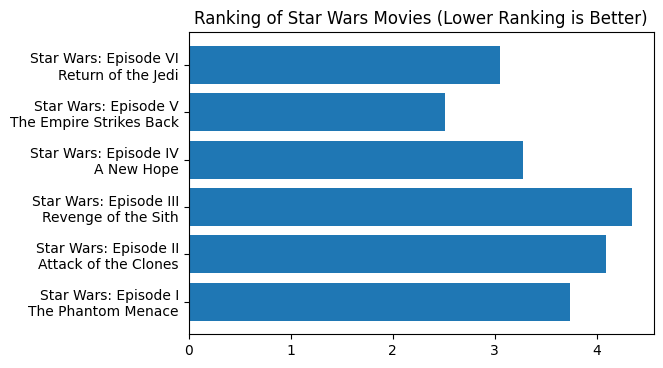

In [119]:
plt.barh(range(6),rank_mean)
plt.title('Ranking of Star Wars Movies (Lower Ranking is Better)')
plt.yticks(ticks=[0,1,2,3,4,5],labels = ['Star Wars: Episode I\nThe Phantom Menace',
             'Star Wars: Episode II\nAttack of the Clones',
             'Star Wars: Episode III\nRevenge of the Sith',
             'Star Wars: Episode IV\nA New Hope',
             'Star Wars: Episode V\nThe Empire Strikes Back',
             'Star Wars: Episode VI\nReturn of the Jedi'])
plt.show()

As suspected, it looks like the "original" movies (Episodes IV-VI) are rated much more highly than the newer ones. Remember that a lower ranking means that the respondent likes the movie better. 

In [109]:
seen = star_wars_new.iloc[:,3:9].sum()
seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

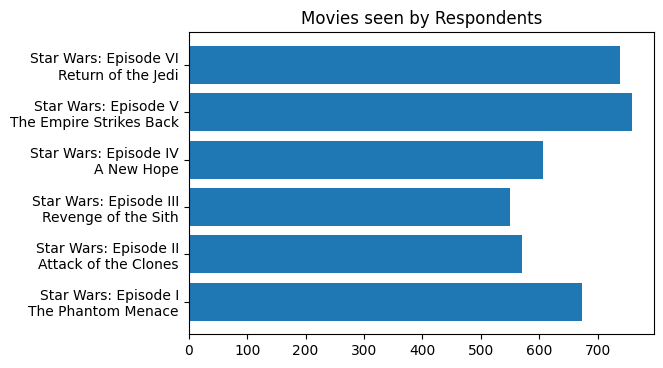

In [121]:
plt.barh(range(6),seen)
plt.title('Movies seen by Respondents')
plt.yticks(ticks=[0,1,2,3,4,5],labels = ['Star Wars: Episode I\nThe Phantom Menace',
             'Star Wars: Episode II\nAttack of the Clones',
             'Star Wars: Episode III\nRevenge of the Sith',
             'Star Wars: Episode IV\nA New Hope',
             'Star Wars: Episode V\nThe Empire Strikes Back',
             'Star Wars: Episode VI\nReturn of the Jedi'])
plt.show()

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

Now that we know the populations opinion as a whole lets see how the fans of the Star Wars franchise responed compared to those who aren't fans 

In [123]:
fans = star_wars_new[star_wars_new['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fans = star_wars_new[star_wars_new['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

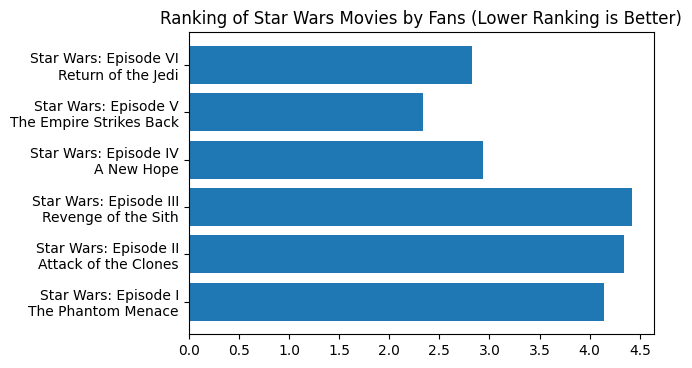

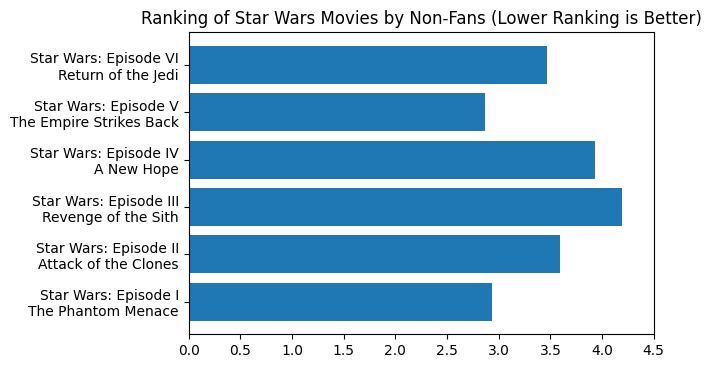

In [128]:
plt.barh(range(6),fans.iloc[:,9:15].mean())
plt.title('Ranking of Star Wars Movies by Fans (Lower Ranking is Better)')
plt.xticks(ticks=[0,.5,1,1.5,2,2.5,3,3.5,4,4.5])
plt.yticks(ticks=[0,1,2,3,4,5],labels = ['Star Wars: Episode I\nThe Phantom Menace',
             'Star Wars: Episode II\nAttack of the Clones',
             'Star Wars: Episode III\nRevenge of the Sith',
             'Star Wars: Episode IV\nA New Hope',
             'Star Wars: Episode V\nThe Empire Strikes Back',
             'Star Wars: Episode VI\nReturn of the Jedi'])
plt.show()

plt.barh(range(6),non_fans.iloc[:,9:15].mean())
plt.title('Ranking of Star Wars Movies by Non-Fans (Lower Ranking is Better)')
plt.xticks(ticks=[0,.5,1,1.5,2,2.5,3,3.5,4,4.5])
plt.yticks(ticks=[0,1,2,3,4,5],labels = ['Star Wars: Episode I\nThe Phantom Menace',
             'Star Wars: Episode II\nAttack of the Clones',
             'Star Wars: Episode III\nRevenge of the Sith',
             'Star Wars: Episode IV\nA New Hope',
             'Star Wars: Episode V\nThe Empire Strikes Back',
             'Star Wars: Episode VI\nReturn of the Jedi'])
plt.show()

It seems that both fans and non-fans tend to like Episode V the best. Fans like the "original" movies way more than the second trilogy, which is expected. What is interesting is that non-fans tend to like Episode I just as much as Episode V. For non-fans there isn't a distinct difference between liking the "original" Movies and not likeing the second trilogy like you see with the fans.

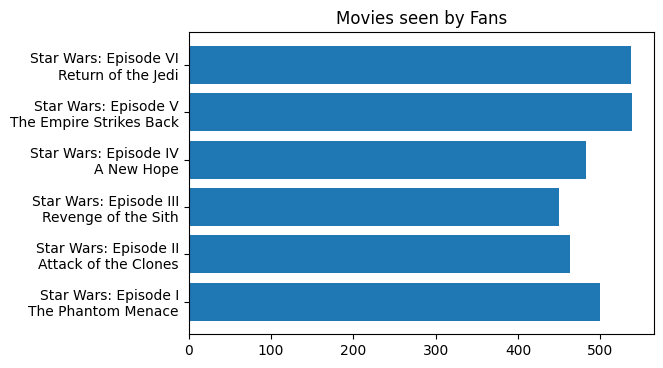

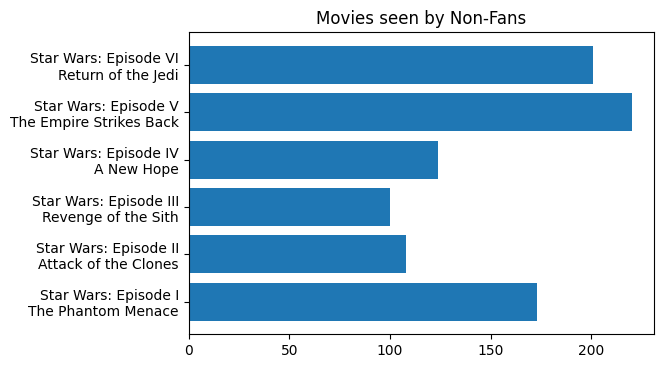

In [129]:
plt.barh(range(6),fans.iloc[:,3:9].sum())
plt.title('Movies seen by Fans')
plt.yticks(ticks=[0,1,2,3,4,5],labels = ['Star Wars: Episode I\nThe Phantom Menace',
             'Star Wars: Episode II\nAttack of the Clones',
             'Star Wars: Episode III\nRevenge of the Sith',
             'Star Wars: Episode IV\nA New Hope',
             'Star Wars: Episode V\nThe Empire Strikes Back',
             'Star Wars: Episode VI\nReturn of the Jedi'])
plt.show()

plt.barh(range(6),non_fans.iloc[:,3:9].sum())
plt.title('Movies seen by Non-Fans')
plt.yticks(ticks=[0,1,2,3,4,5],labels = ['Star Wars: Episode I\nThe Phantom Menace',
             'Star Wars: Episode II\nAttack of the Clones',
             'Star Wars: Episode III\nRevenge of the Sith',
             'Star Wars: Episode IV\nA New Hope',
             'Star Wars: Episode V\nThe Empire Strikes Back',
             'Star Wars: Episode VI\nReturn of the Jedi'])
plt.show()

Fans tend to see the "original" movies more than the second trilogy. Non-fans tend to see Episode V and VI the most.